In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
recipe= pd.read_csv('recipes.csv')

In [4]:
recipe.head()

,Unnamed: 0,id,title,image,imageType,calories,protein,fat,carbs
0,0,157834,LAMB AND KIDNEY HOT- POT,https://spoonacular.com/recipeImages/157834-31...,jpg,663,34g,46g,27g
1,1,390813,Easy Korean Beef,https://spoonacular.com/recipeImages/390813-31...,jpg,326,33g,12g,20g
2,2,622598,Pittata - Pizza Frittata,https://spoonacular.com/recipeImages/622598-31...,jpg,587,44g,42g,6g
3,3,631824,(Lighter) Classic Eggplant Parmigiana,https://spoonacular.com/recipeImages/631824-31...,jpg,304,16g,16g,29g
4,4,632300,Amazing Chicken Burgers,https://spoonacular.com/recipeImages/632300-31...,jpg,361,32g,18g,17g


In [4]:
#recipe.info()
recipes=recipe.drop(columns=['Unnamed: 0','image','imageType'])
recipes.head()

,id,title,calories,protein,fat,carbs
0,157834,LAMB AND KIDNEY HOT- POT,663,34g,46g,27g
1,390813,Easy Korean Beef,326,33g,12g,20g
2,622598,Pittata - Pizza Frittata,587,44g,42g,6g
3,631824,(Lighter) Classic Eggplant Parmigiana,304,16g,16g,29g
4,632300,Amazing Chicken Burgers,361,32g,18g,17g


In [31]:

recipes.isna().sum()

id          0
title       0
calories    0
protein     0
fat         0
carbs       0
dtype: int64

In [7]:
recipes['protein (gram)']=recipes['protein'].str.replace('g','').astype(int)
recipes['fat (gram)']=recipes['fat'].str.replace('g','').astype(int)
recipes['carbs (gram)']=recipes['carbs'].str.replace('g','').astype(int)

In [8]:
final=recipes.drop(columns=['protein','fat','carbs'])
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              300 non-null    int64 
 1   title           300 non-null    object
 2   calories        300 non-null    int64 
 3   protein (gram)  300 non-null    int32 
 4   fat (gram)      300 non-null    int32 
 5   carbs (gram)    300 non-null    int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 10.7+ KB


In [9]:
#Looking over summary statistics of numerical values
perc =[.20, .40, .60, .80]
include =['object', 'float', 'int']
final[['calories','fat (gram)','protein (gram)','carbs (gram)']].describe(percentiles = perc, include = include).applymap('{:,.2f}'.format)

,calories,fat (gram),protein (gram),carbs (gram)
count,300.00,300.00,300.00,300.00
mean,548.73,28.63,32.39,40.93
std,223.06,18.76,15.27,23.42
min,138.00,1.00,15.00,0.00
20%,362.60,12.00,19.00,19.00
40%,455.20,20.60,26.00,33.00
50%,508.00,25.50,29.00,39.00
60%,576.80,30.00,32.40,45.40
80%,717.60,43.00,41.20,63.20
max,"1,249.00",96.00,98.00,92.00


Look at what dishes are the highest in each variable

In [91]:
print('The dish with the highest amount of calories:')
final.iloc[final[['calories']].idxmax()]

The dish with the highest amount of calories:


,id,title,calories,protein (gram),fat (gram),carbs (gram)
235,648914,Kim's Baked Macaroni & Cheese,1249,61,94,52


In [92]:
print('The dish with the highest amount of protein:')
final.iloc[final[['protein (gram)']].idxmax()]

The dish with the highest amount of protein:


,id,title,calories,protein (gram),fat (gram),carbs (gram)
126,640869,Crock Pot Shredded French Dip,1039,98,55,39


In [93]:
print('The dish with the highest amount of fats:')
final.iloc[final[['fat (gram)']].idxmax()]

The dish with the highest amount of fats:


,id,title,calories,protein (gram),fat (gram),carbs (gram)
48,645884,Grilled Spareribs With Birmingham Bbq Sauce,1224,59,96,28


In [94]:
print('The dish with the highest amount of carbs:')
final.iloc[final[['carbs (gram)']].idxmax()]

The dish with the highest amount of carbs:


,id,title,calories,protein (gram),fat (gram),carbs (gram)
298,994607,Kaiserschmarrn,783,29,32,92


Exploring different scatterplots

<AxesSubplot:xlabel='calories', ylabel='protein (gram)'>

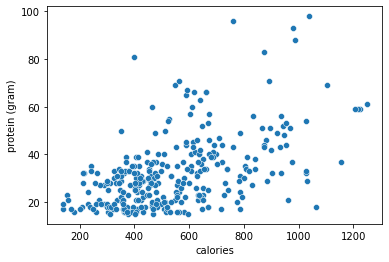

In [16]:
sns.scatterplot(x='calories',y='protein (gram)', data=final)

<AxesSubplot:xlabel='calories', ylabel='fat (gram)'>

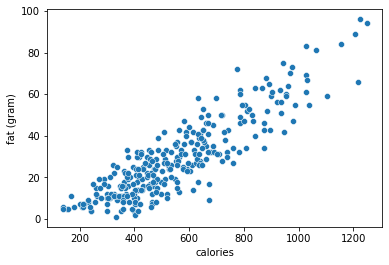

In [17]:
sns.scatterplot(x='calories',y='fat (gram)', data=final)
#It appears there is a sort of linear relationship here between calories and fat

<AxesSubplot:xlabel='calories', ylabel='carbs (gram)'>

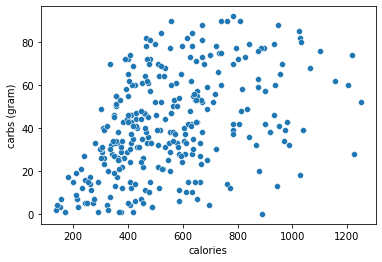

In [18]:
sns.scatterplot(x='calories',y='carbs (gram)', data=final)

<AxesSubplot:xlabel='carbs (gram)', ylabel='fat (gram)'>

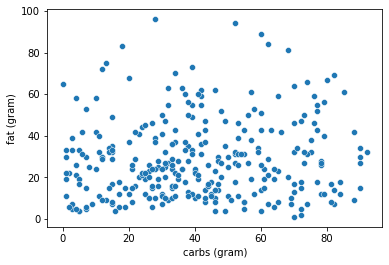

In [19]:
sns.scatterplot(x='carbs (gram)',y='fat (gram)', data=final)
#I assumed there would be a more linear relationship here that the more carbs
# you have the more fat you have but this proves that wrong

<AxesSubplot:xlabel='carbs (gram)', ylabel='protein (gram)'>

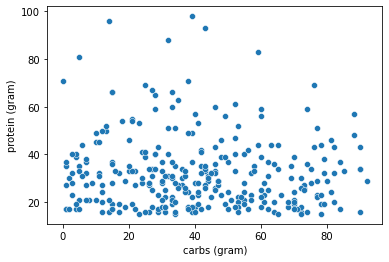

In [20]:
sns.scatterplot(x='carbs (gram)',y='protein (gram)', data=final)

<AxesSubplot:xlabel='protein (gram)', ylabel='fat (gram)'>

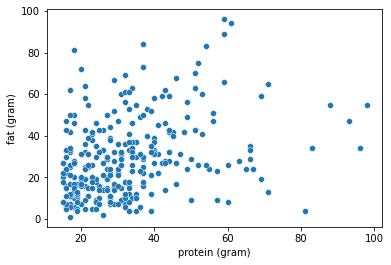

In [21]:
sns.scatterplot(x='protein (gram)',y='fat (gram)', data=final)
#I am not sure what is happening here but it is interesting. There may be a sort of interaction

Checking if there is correlation

[Text(0.5, 1.0, 'Correlation Matrix')]

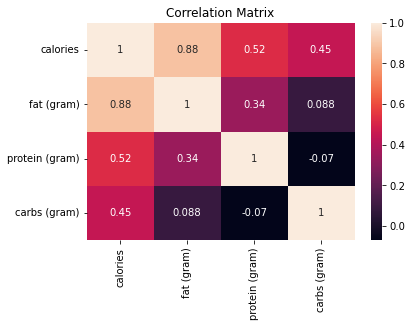

In [27]:
temp=final[['calories','fat (gram)','protein (gram)','carbs (gram)']]
corr=temp.corr()
sns.heatmap(corr,annot=True).set(title='Correlation Matrix')

#It looks like the negative correlation is between carbs and protein
#There appears to be a weak positive correlation between carbs and fat
#The highest positive correlation is between fat and calories, which was seen from the scatterplots earlier.

In [28]:
meat=[]
for i in final['title']:
    if 'chicken' in i:
        meat.append('True')
        if 'beef' in i:
            meat.append('True')
        elif 'ham' in i:
            meat.append('True')
        elif 'turkey' in i:
            meat.append('True')
        elif 'pork' in i:
            meat.append('True')
        elif 'lamb' in i:
            meat.append('True')
        elif 'duck' in i:
            meat.append('True')
        elif 'fish' in i:
            meat.append('True')
        else:
            meat.append('False')
    else:
        meat.append('False')
            